In [5]:
import sys
import os
import json
sys.path.append(os.getcwd())

from environment import Environment

env = Environment()

import importlib
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

# from experiment import Experiment
# from dataset import Reader
# import toolbox as tbx

# from models import metrics


environment loaded


In [6]:
evaluation_root = os.path.join(env.EXPERIMENT_ROOT, '_evaluation')


In [8]:
modelorder = [
              'sis2',
              # 'sis2-1',
              # 'sis2-2',
              # 'sis2-3',# bad results alt12 masked and unmasked
              'sis3',
              # 'sis3-1',
              # 'sis3-2',
              # 'sis3-3',# cur: bad - wait for alt12 results
              # 'sis3-a',
              # 'sis3-b',
              # 'sis3-c',
              # 'sis3-d',
              'sis4',
              # 'sis5',
              # 'sis6',
              # 'sis10',
              # 'sis11',
              # 'sis12',
            #   'sis22',
            #   'sis23',# outlyer values, recheck after all results
            #   'sis25',
            #   'sis26',

              'dmnet',
              'dsen2w',
              'pix2pix',
              'psgan',
              'srgan',
              'srs3',
              'tarsgan'
              ]

metrics = {'SAM': True,
           'RMSE': True,
           'ERGAS': True,

           'SSIM': False,
           'CC': False,
           'sCC': False,
           'HPSI': False,
           'UIQC': False,
           'PSNR': False}


In [17]:
columnnames = ['loss',
               'mask',
               'dataset',
               'model',
               'batch']

data_frames = []
for filename in os.listdir(evaluation_root):
    if filename.endswith(".csv"):
        # Read the CSV file into a DataFrame
        filepath = os.path.join(evaluation_root, filename)
        df = pd.read_csv(filepath)
        
        # Split the filename by "_"
        file_values = filename[:-14].split("_")
        
        # Add each value from the filename as a new column in the DataFrame
        for i, value in enumerate(file_values):
            df[columnnames[i]] = value        
        # Append the DataFrame to the list
        data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True).drop('index', axis=1)
combined_df['batch'].fillna('b16', inplace=True)

combined_df = combined_df[combined_df['model'].isin(modelorder)]


In [18]:
def boxplot(combined_df, metric='SSIM', x='model', dataset='cur', inmask:bool=None, groupby:str=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    ax:plt.Axes
    data = combined_df
    if inmask is not None:
        if inmask:
            data = data[data['mask'] == 'inmask']
        else:
            data = data[data['mask'] == 'notinmask']

    if dataset is not None:
        data = data[data['dataset'] == dataset]
    
    sns.boxplot(data=data, x=x, y=metric, hue=groupby, ax=ax, order=modelorder)

    # Set labels and title
    ax.set_xlabel(x)
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} per {x}')
    ax.grid(visible=True, which='both')
    plt.xticks(rotation=70)  # Rotate the x-axis labels for better readability
    plt.show()


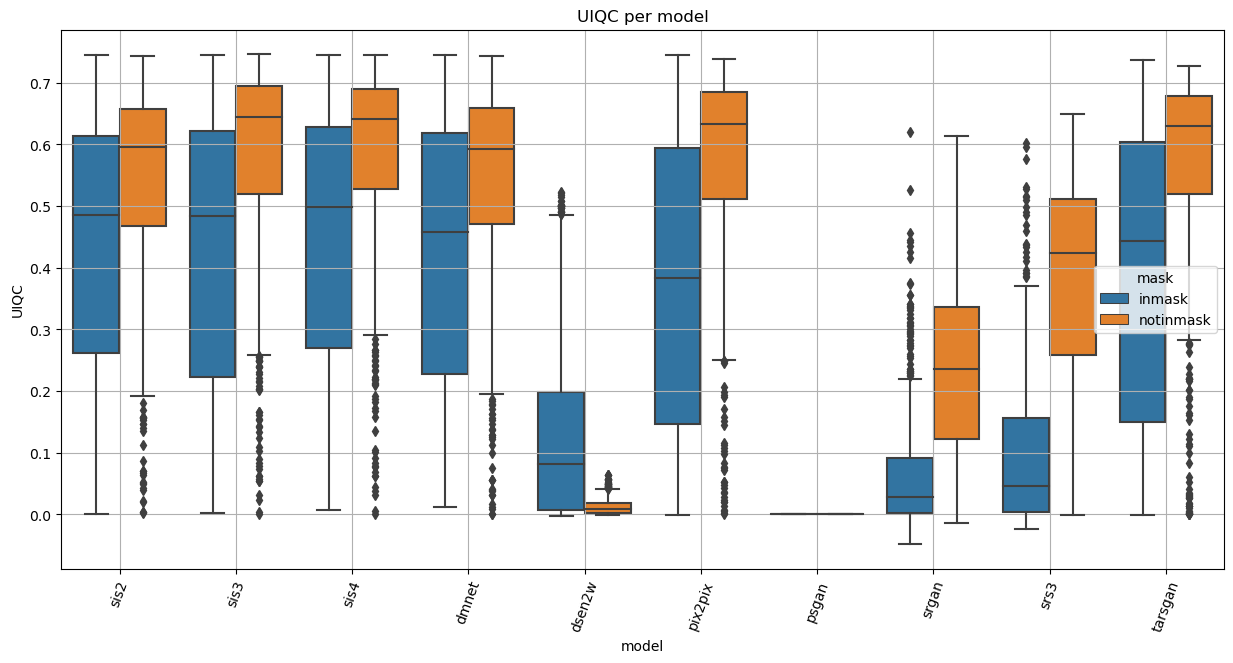

In [19]:
boxplot(combined_df, x='model', metric='UIQC', inmask=None, dataset='alt12', groupby='mask')

In [20]:
grouped_df = combined_df.groupby(columnnames).agg(["mean", "std"]).reset_index()
grouped_df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in grouped_df.columns.values]

grouped_df

,loss,mask,dataset,model,batch,SAM_mean,SAM_std,sCC_mean,sCC_std,CC_mean,...,SSIM_mean,SSIM_std,PSNR_mean,PSNR_std,RMSE_mean,RMSE_std,ERGAS_mean,ERGAS_std,UIQC_mean,UIQC_std
0,s5lw,inmask,alt12,dmnet,b16,0.050260,0.005636,0.673706,0.118211,0.568117,...,0.427960,0.153565,16.192379,3.315333,0.000465,3.304643e-04,3.302627,2.869948,4.221058e-01,2.201933e-01
1,s5lw,inmask,alt12,dsen2w,b16,0.131659,0.067722,0.329494,0.194332,0.225428,...,0.413271,0.165960,12.427717,3.144914,0.002207,3.903889e-03,14.471039,32.965017,1.258485e-01,1.385785e-01
2,s5lw,inmask,alt12,pix2pix,b16,0.022189,0.017065,0.691902,0.153125,0.505617,...,0.343757,0.134589,16.960174,3.225748,0.000482,4.081824e-04,3.338132,3.192385,3.720539e-01,2.375237e-01
3,s5lw,inmask,alt12,psgan,b16,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.003906,3.398289e-10,NaN,NaN,0.000000e+00,0.000000e+00
4,s5lw,inmask,alt12,sis2,b16,0.026705,0.012575,0.764879,0.115484,0.575183,...,0.424482,0.165346,17.418375,4.144822,0.000416,3.811067e-04,3.000583,3.293289,4.292259e-01,2.176562e-01
5,s5lw,inmask,alt12,sis3,b16,0.025959,0.008926,0.734590,0.132867,0.566320,...,0.400411,0.163819,19.068720,3.328894,0.000429,3.752412e-04,3.003196,3.071167,4.214181e-01,2.293227e-01
6,s5lw,inmask,alt12,sis4,b16,0.013683,0.008239,0.778085,0.115019,0.595170,...,0.450598,0.172613,19.813790,3.942017,0.000393,3.476774e-04,2.852317,2.971174,4.428090e-01,2.169878e-01
7,s5lw,inmask,alt12,srgan,b16,0.099179,0.079671,0.306328,0.138037,0.099924,...,0.344990,0.144126,13.476227,3.549848,0.001427,2.471004e-03,24.230607,116.153510,6.611820e-02,9.489112e-02
8,s5lw,inmask,alt12,srs3,b16,0.190859,0.058147,0.166976,0.205052,0.181676,...,0.329918,0.130695,13.439072,4.222118,0.002367,4.011930e-03,17.907958,36.359133,9.744074e-02,1.206480e-01
9,s5lw,inmask,alt12,tarsgan,b8,0.021989,0.012980,0.774201,0.101923,0.532508,...,0.463851,0.165884,13.928808,4.542105,0.000411,2.822794e-04,2.818403,2.303232,3.873817e-01,2.427535e-01


In [21]:
def quintile(metric:str, num_quint:int=5, masked:bool=None, dataset:str=None, returndf:bool=False):
    summary_df = grouped_df.copy()
    if masked is not None:
        if masked:
            summary_df = summary_df[summary_df['mask'] == 'inmask']
        else:
            summary_df = summary_df[summary_df['mask'] == 'notinmask']
    if dataset is not None:
        summary_df = summary_df[summary_df['dataset'] == dataset]
    
    if metrics[metric]:
        min = summary_df[f'{metric}_mean'].min()
        step = (summary_df[f'{metric}_mean'].max() - summary_df[f'{metric}_mean'].min()) / (num_quint - 1)
    else:
        min = summary_df[f'{metric}_mean'].max()
        step = (summary_df[f'{metric}_mean'].min() - summary_df[f'{metric}_mean'].max()) / (num_quint - 1)

    def calculate_quintile(row) -> int:
        try:
            return int((row[f'{metric}_mean'] - min) / step) + 1
        except:
            return None
        
    result = summary_df.apply(calculate_quintile, axis=1)

    if returndf:
        summary_df[f'{metric}_quint'] = result
        return summary_df[[f'model','mask','dataset',f'{metric}_mean',f'{metric}_std',f'{metric}_quint']].sort_values(f'{metric}_mean', ascending=metrics[metric])
    else:
        return result


In [71]:
quintile('UIQC', masked=False, dataset='cur', returndf=True)


,model,mask,dataset,UIQC_mean,UIQC_std,UIQC_quint
33,sis2,notinmask,cur,3.704912e-01,1.753110e-01,1
35,sis4,notinmask,cur,3.620976e-01,1.805120e-01,1
34,sis3,notinmask,cur,3.509208e-01,1.813269e-01,1
30,dmnet,notinmask,cur,3.154968e-01,1.880195e-01,1
32,psgan,notinmask,cur,2.978431e-01,1.658518e-01,1
37,srs3,notinmask,cur,2.759977e-01,1.761269e-01,2
31,pix2pix,notinmask,cur,2.620298e-01,1.701630e-01,2
36,srgan,notinmask,cur,2.155421e-01,1.411682e-01,2
38,tarsgan,notinmask,cur,5.875526e-11,1.164510e-09,5


In [110]:
my_mask = 'inmask'
my_dataset = 'alt12'

test = grouped_df[(grouped_df['mask'] == my_mask) & (grouped_df['dataset'] == my_dataset)].copy()

for metric in metrics:
    def meanandstd(row) -> str:
        try:
            return f'{round(row[f"{metric}_mean"], 3)}\n(+/- {round(row[f"{metric}_std"], 3)})'
        except:
            return None
        
    test[metric] = test.apply(meanandstd, axis=1)
    test = test.drop([f'{metric}_mean',f'{metric}_std'], axis=1)

test = test.drop(['loss','batch'], axis=1)
test = test.set_index('model')

test.to_csv(f'eval_{my_dataset}_{my_mask}.csv', index=True)
test


,mask,dataset,SAM,RMSE,ERGAS,SSIM,CC,sCC,HPSI,UIQC,PSNR
model,,,,,,,,,,,
dmnet,inmask,alt12,0.05\n(+/- 0.006),0.0\n(+/- 0.0),3.303\n(+/- 2.87),0.428\n(+/- 0.154),0.568\n(+/- 0.292),0.674\n(+/- 0.118),0.5\n(+/- 0.083),0.422\n(+/- 0.22),16.192\n(+/- 3.315)
dsen2w,inmask,alt12,0.132\n(+/- 0.068),0.002\n(+/- 0.004),14.471\n(+/- 32.965),0.413\n(+/- 0.166),0.225\n(+/- 0.208),0.329\n(+/- 0.194),0.175\n(+/- 0.049),0.126\n(+/- 0.139),12.428\n(+/- 3.145)
pix2pix,inmask,alt12,0.022\n(+/- 0.017),0.0\n(+/- 0.0),3.338\n(+/- 3.192),0.344\n(+/- 0.135),0.506\n(+/- 0.311),0.692\n(+/- 0.153),0.47\n(+/- 0.104),0.372\n(+/- 0.238),16.96\n(+/- 3.226)
psgan,inmask,alt12,0.0\n(+/- 0.0),0.004\n(+/- 0.0),nan\n(+/- nan),nan\n(+/- nan),nan\n(+/- nan),nan\n(+/- nan),nan\n(+/- nan),0.0\n(+/- 0.0),nan\n(+/- nan)
sis2,inmask,alt12,0.027\n(+/- 0.013),0.0\n(+/- 0.0),3.001\n(+/- 3.293),0.424\n(+/- 0.165),0.575\n(+/- 0.288),0.765\n(+/- 0.115),0.461\n(+/- 0.105),0.429\n(+/- 0.218),17.418\n(+/- 4.145)
sis3,inmask,alt12,0.026\n(+/- 0.009),0.0\n(+/- 0.0),3.003\n(+/- 3.071),0.4\n(+/- 0.164),0.566\n(+/- 0.303),0.735\n(+/- 0.133),0.504\n(+/- 0.08),0.421\n(+/- 0.229),19.069\n(+/- 3.329)
sis4,inmask,alt12,0.014\n(+/- 0.008),0.0\n(+/- 0.0),2.852\n(+/- 2.971),0.451\n(+/- 0.173),0.595\n(+/- 0.286),0.778\n(+/- 0.115),0.534\n(+/- 0.101),0.443\n(+/- 0.217),19.814\n(+/- 3.942)
srgan,inmask,alt12,0.099\n(+/- 0.08),0.001\n(+/- 0.002),24.231\n(+/- 116.154),0.345\n(+/- 0.144),0.1\n(+/- 0.134),0.306\n(+/- 0.138),0.211\n(+/- 0.055),0.066\n(+/- 0.095),13.476\n(+/- 3.55)
srs3,inmask,alt12,0.191\n(+/- 0.058),0.002\n(+/- 0.004),17.908\n(+/- 36.359),0.33\n(+/- 0.131),0.182\n(+/- 0.178),0.167\n(+/- 0.205),0.206\n(+/- 0.068),0.097\n(+/- 0.121),13.439\n(+/- 4.222)


In [32]:
combined_df

,SAM,sCC,CC,HPSI,SSIM,PSNR,RMSE,ERGAS,UIQC,loss,mask,dataset,model,batch
0,0.111033,0.430112,0.273068,0.163990,0.493573,10.728346,0.001666,10.788887,1.584502e-01,s5lw,inmask,alt12,dsen2w,NaN
1,0.098496,0.246948,0.099311,0.184440,0.365335,10.687845,0.001603,10.384046,3.110618e-02,s5lw,inmask,alt12,dsen2w,NaN
2,0.114713,0.406049,0.262415,0.127670,0.458655,9.706113,0.001745,11.322373,1.601590e-01,s5lw,inmask,alt12,dsen2w,NaN
3,0.114726,0.414694,0.244321,0.159440,0.494986,17.378804,0.001621,10.612742,1.075542e-01,s5lw,inmask,alt12,dsen2w,NaN
4,0.227476,0.426111,0.454043,0.161188,0.178512,10.652972,0.002256,14.252510,3.107505e-01,s5lw,inmask,alt12,dsen2w,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60145,1.980813,0.264872,-0.083825,0.046985,0.111173,7.326603,22559.709218,25.924000,4.278706e-14,s5lw,notinmask,cur,tarsgan,b8
60146,1.966617,0.420723,-0.071149,0.145650,0.117955,6.178533,22238.015019,25.340542,9.647796e-15,s5lw,notinmask,cur,tarsgan,b8
60147,2.349112,-0.223578,-0.087021,0.170044,0.270970,9.212983,9691.434981,28.809569,7.880237e-14,s5lw,notinmask,cur,tarsgan,b8
60148,2.355343,-0.273287,-0.156930,0.164764,0.379654,10.188765,8945.845963,28.949800,8.885344e-14,s5lw,notinmask,cur,tarsgan,b8
